<a href="https://colab.research.google.com/github/Leenasmk3/IT326-DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problem:
The sinking of the RMS Titanic in 1912 resulted in over 1,500 deaths, raising critical questions about what factors determined passenger survival. This project aims to predict whether a Titanic passenger survived based on demographic and socioeconomic features such as age, gender, passenger class, fare, family size, and port of embarkation. We also seek to discover hidden patterns by clustering passengers into meaningful groups based on their characteristics. This problem is important because it provides insights into how social hierarchies and demographics influenced survival during emergencies, demonstrates practical applications of machine learning in historical analysis, and helps identify survival patterns that can inform modern disaster response planning and risk assessment strategies. Understanding these factors not only reveals historical biases but also showcases how data mining techniques can extract actionable insights from real-world datasets to support better decision-making in emergency situations.

#2. Data Mining Task:
In our project, we will use two data mining tasks to help us predict the survival of Titanic passengers: classification and clustering.

For classification, we will train our model to classify whether a passenger survived or not using the (Survived) class label based on a set of passenger characteristics such as passenger class (Pclass), gender (Sex), age (Age), number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), ticket fare (Fare), port of embarkation (Embarked), and other relevant features. The model will learn patterns from labeled historical data where the survival outcome is known, enabling it to predict survival for new passenger records.

For clustering, our model will create a set of clusters grouping passengers who have similar characteristics such as social class, family size, age groups, and fare ranges. These clusters will help identify distinct passenger segments with common attributes and survival patterns. By analyzing these natural groupings, we can discover hidden relationships in the data and understand which passenger profiles were more likely to survive. The identified clusters can then be used to predict survival outcomes for new passengers based on which cluster they belong to, enhancing our understanding of the survival patterns.

# 3. Data

Data Selection • Number of rows: 891 • Number of columns: 12

Main observations about the raw dataset: • The dataset contains many missing values, especially in: • Age • Cabin • Embarked

There are noticeable outliers in: • Age • Fare

The dataset is imbalanced, as most passengers did not survive

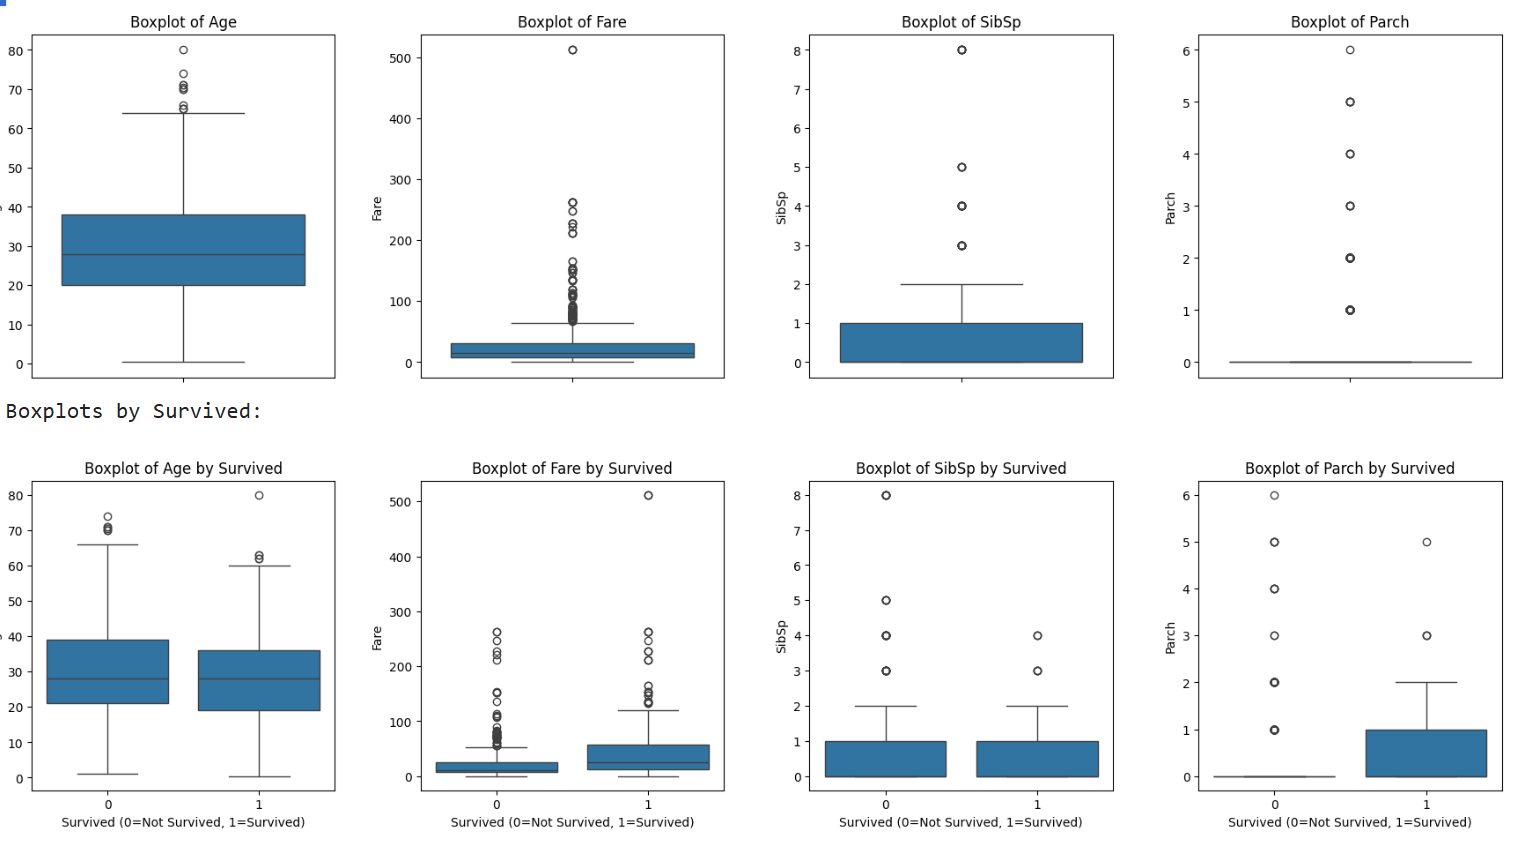

Boxplots were generated for all numeric variables and grouped by the class label Survived. They helped visually identify:

• Survivors generally had higher fares and slightly younger ages.

• Most passengers had SibSp and Parch near zero, showing they were traveling alone.

• Outliers were clearly visible in Fare and Age.

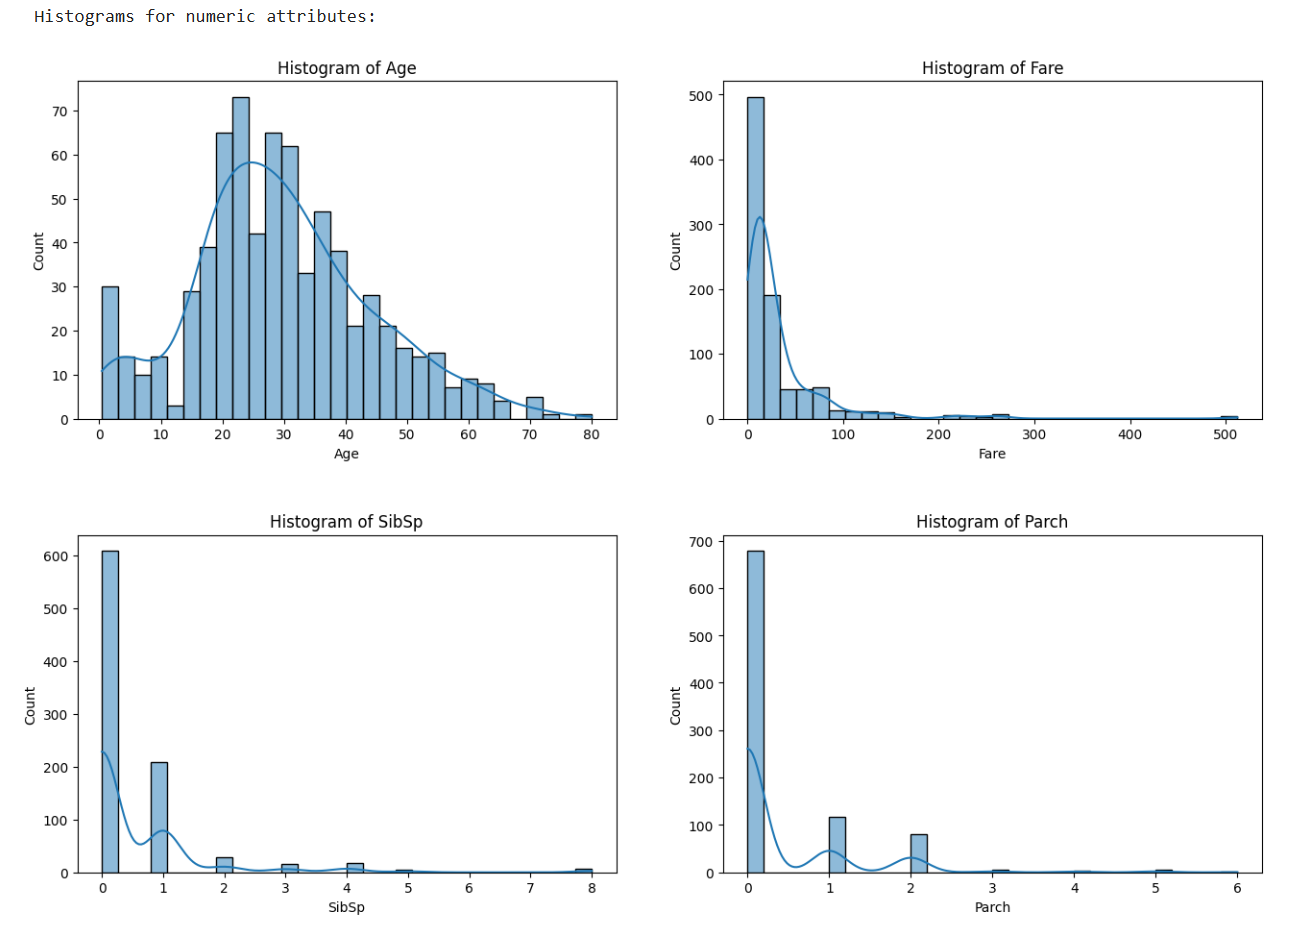
Histograms were plotted for numeric attributes (Age, Fare, SibSp, and Parch) to visualize their distributions. The analysis showed:

• Age had a roughly normal distribution with missing values.

• Fare was right-skewed, with many low fares and a few very high ones.

• SibSp and Parch were heavily concentrated at 0.

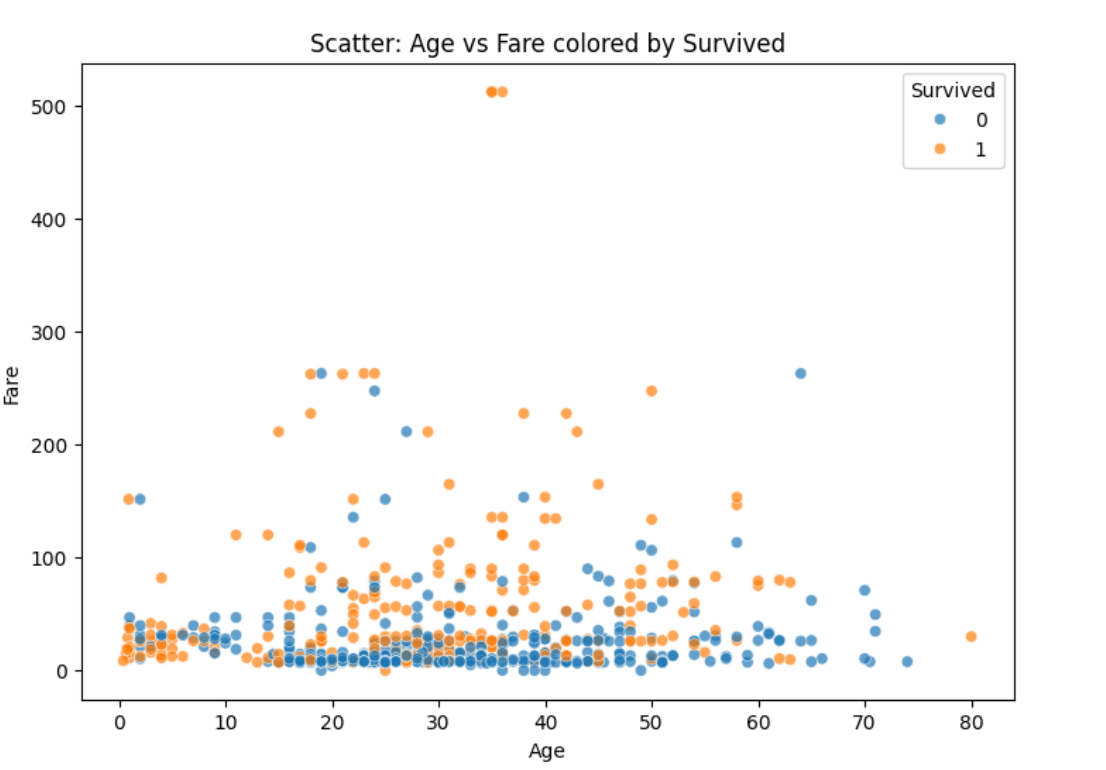
A scatter plot between Age and Fare, colored by Survived, was created to analyze relationships between numeric variables and the survival outcome. The results showed that:

• Passengers with higher fares were more likely to survive (typically first-class).

• Younger passengers were distributed across both survived and non-survived groups.

This provided insight into the influence of economic status and age on survival.

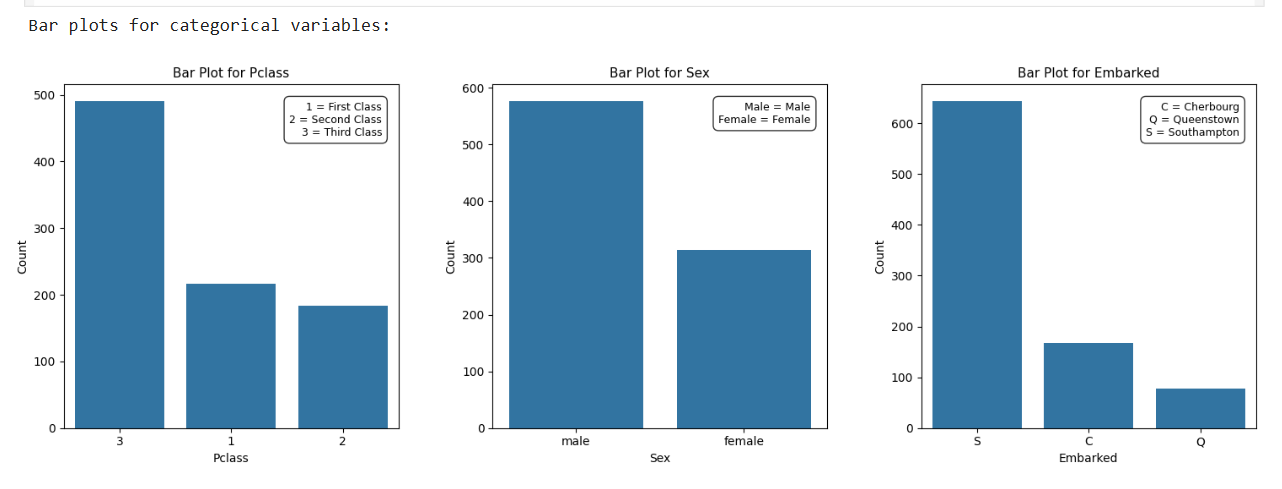
Bar plots for Pclass, Sex, and Embarked revealed that most passengers were third-class and male, though females had higher survival rates, and most boarded at Southampton. These plots highlighted how class, gender, and embarkation port affected survival.

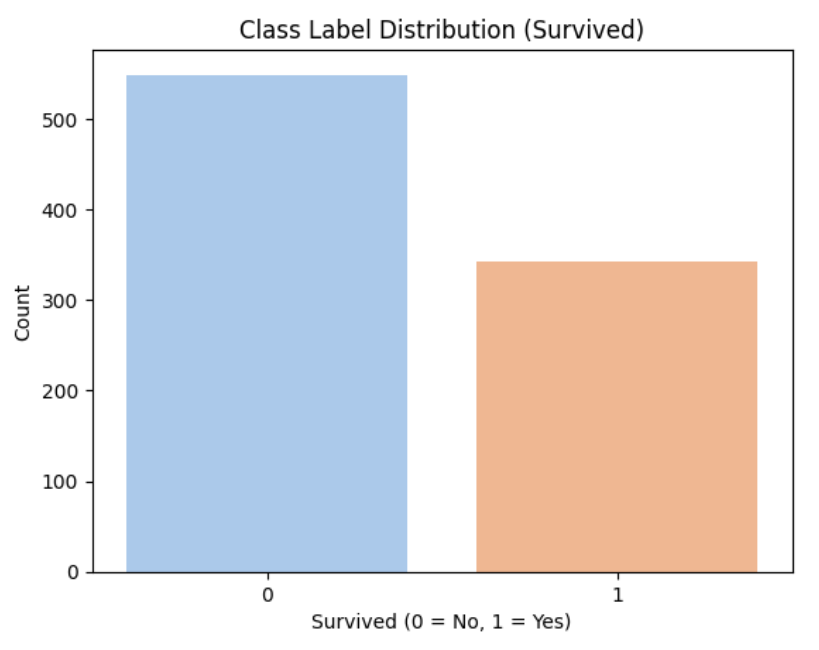

The bar plot for the Survived class label showed that the number of passengers who did not survive (0) was higher than those who survived (1), indicating an overall lower survival rate among passengers. The dataset is slightly imbalanced, with more passengers not surviving than those who did. This imbalance should be considered in the modeling phase to prevent bias in predictions.

#4. Data preprocessing:

The following preprocessing tasks were applied to clean the data, remove noise, and prepare it for modeling:

A. Handling Missing Values
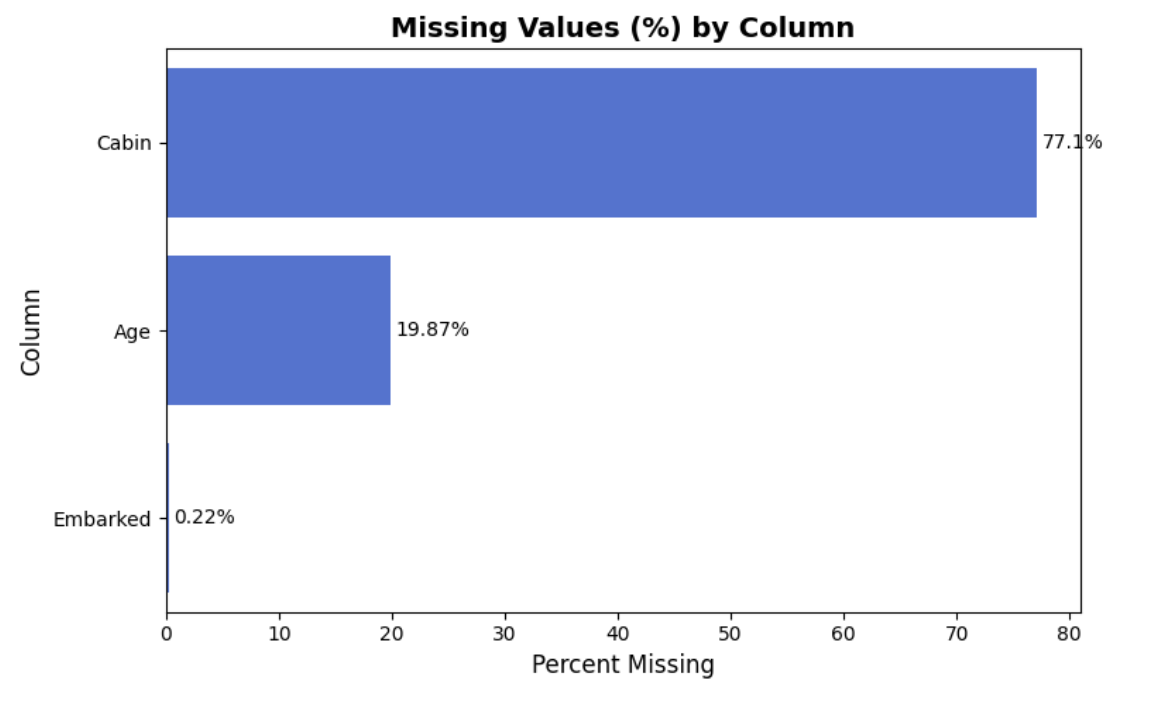
The missing values chart shows that the Cabin column has an extremely high percentage of missing data (about 77%), making it unreliable for analysis. Therefore, it was removed during preprocessing.
The Age column has around 20% missing values, which is noticeable but still manageable, so its missing entries were filled using the median.
The Embarked column has less than 1% missing values, so its missing entries were filled using the most frequent value (mode).
These preprocessing steps ensured that the dataset became complete and suitable for the next analysis steps.

B. Variable Transformation and Discretization
 * Fare Transformation:
   * A logarithmic transformation  was applied to the Fare feature to create a new feature, Fare_log.

   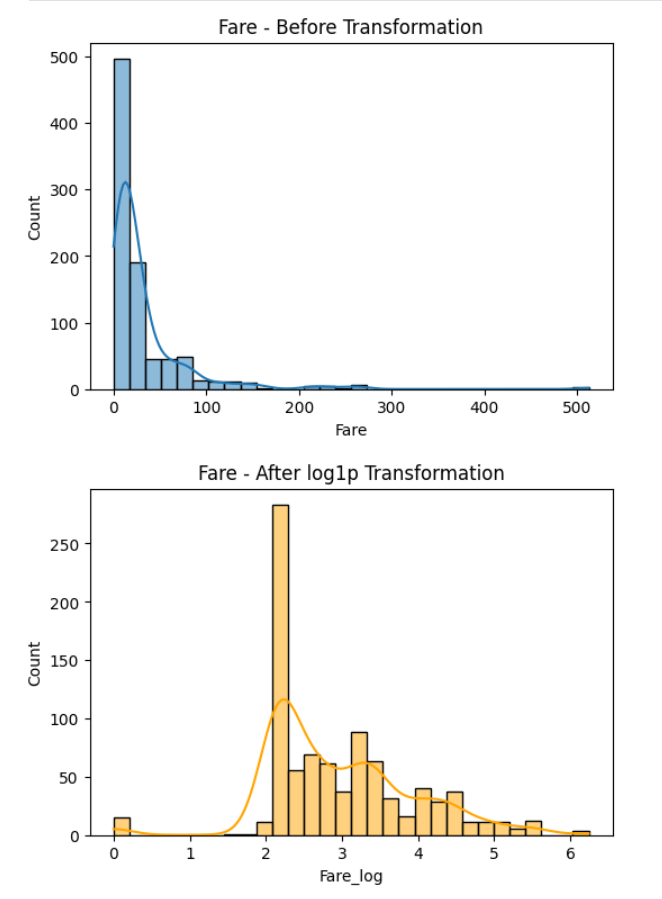

   The original Fare distribution was highly right-skewed, with most passengers paying low fares and a few paying extremely high amounts.
  After applying the log1p transformation, the distribution became more balanced and less skewed, making the data more suitable for modeling.
  The original Fare column was then dropped.

 * Age Discretization:
   * The continuous Age values were discretized into five age categories (Child, Teen, YoungAdult, Adult, Senior).

   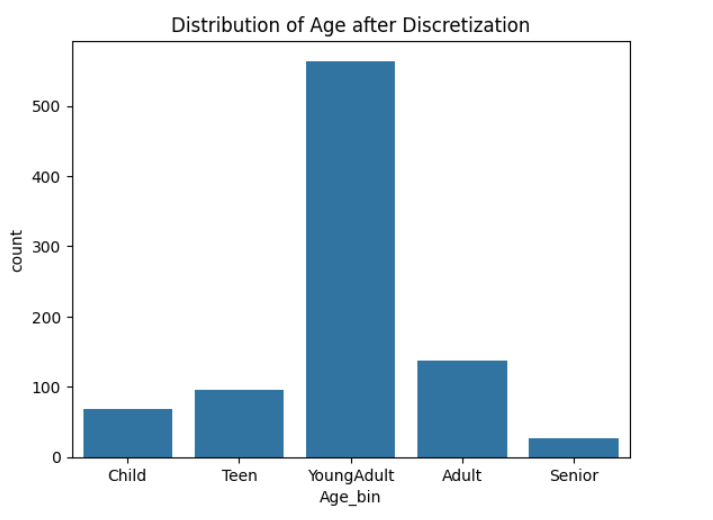

   From the chart, we can see that most passengers on the Titanic were young adults, which gives a clear understanding of the overall age distribution. Children and seniors were much fewer compared to this group.

C. Outlier Removal

 To ensure that extreme values do not negatively affect the accuracy of the mathematical models.

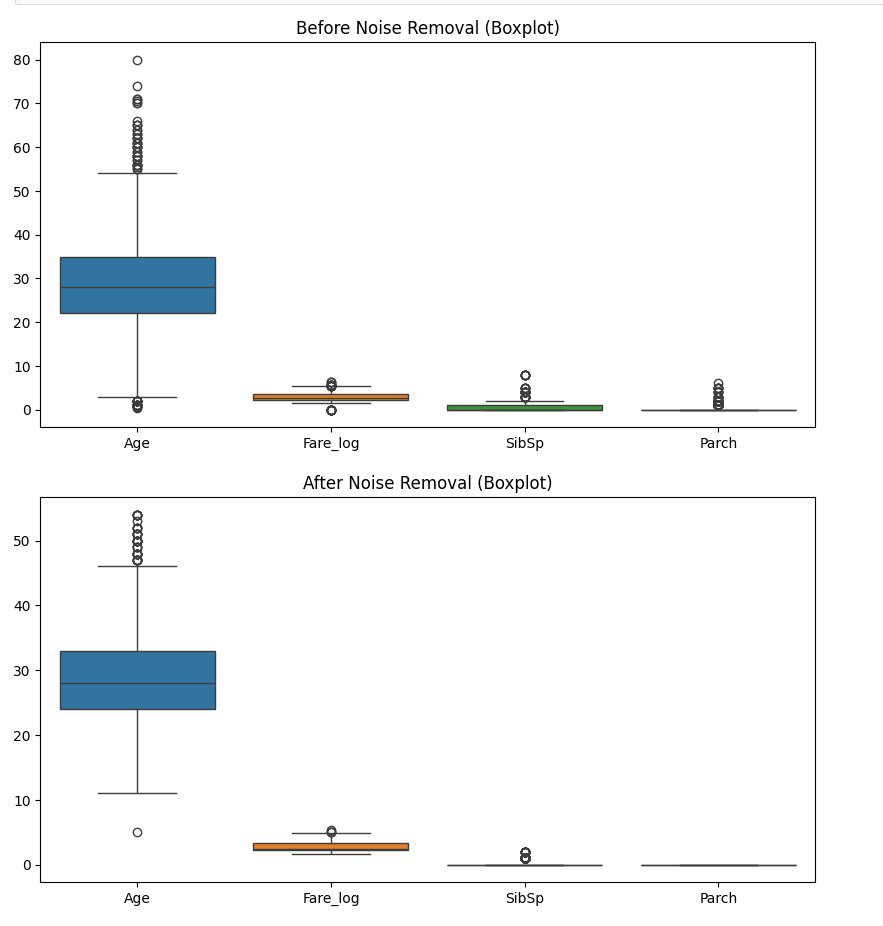

The original distribution show a significant presence of Outliers in features like Age, SibSp, and Parch, and to a lesser extent in Fare_log. These outliers represent extreme values that can skew model training.
After applying the Outlier Removal using the Interquartile Range (IQR) Method، the distributions became more compact and concentrated. The extreme outliers were successfully eliminated from all features.

D. Scaling and Encoding
 * Normalization (Min-Max Normalization):
   * MinMaxScaler was applied to the processed numerical attributes. To unify the range of these features between 0 and 1, preventing features with larger initial values from dominating the distance-based models.
   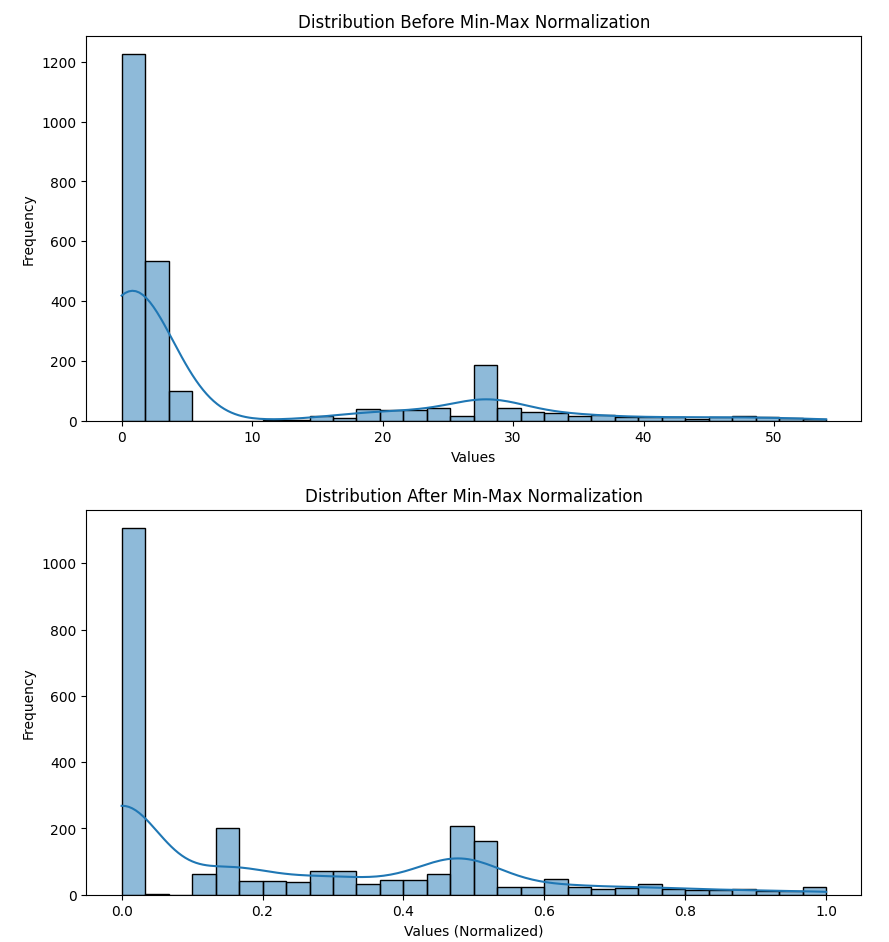

   The original distributions show that the numerical features (Age, Fare_log, SibSp, Parch) were spread across different, varying scales (from 0 up to around 55 on the X-axis) most of them centralized at zero .This difference in scale could bias models towards features with larger values.
   After applying the Min-Max Normalization, the distributions became unified. The values for all features were successfully scaled and compressed to the exact range of 0.0 to 1.0, while preserving the inherent shape of their distributions.

E. Feature Selection
 * The ANOVA F-test using SelectKBest was employed to identify the top 5 features correlated with the target variable Survived.

 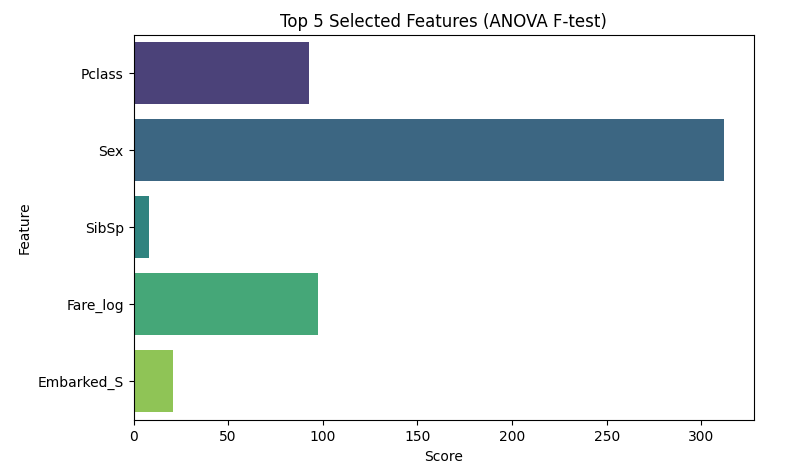


The feature importance shows an extreme dominance by Sex and Pclass .
• Sex obtained the highest score (over 300), confirming it is the most influential factor for predicting survival.
• Fare_log followed as the second most important feature with a score near 100.
• Pclass was the third most influential predictor.
• SibSp and Embarked_S received very low scores, indicating their minor contribution to the prediction model.
This analysis validates that Sex and Pclass are the primary drivers of survival prediction.

#5. Data Mining Technique:
We will apply two main data mining techniques to the Titanic dataset: Classification and Clustering.

For **classification**, we will use Decision Tree Classifier from
( *sklearn.tree.DecisionTreeClassifier* ) with both Gini index and entropy as splitting criteria to predict passenger survival outcomes. We will split the data using train_test_split from ( *sklearn.model_selection* ) into three different partitions (**70-30, 80-20, and 60-40**) to evaluate model robustness. For each partition and criterion, we will assess performance using accuracy_score and confusion_matrix from
 ( *sklearn.metrics* ). We will visualize the decision tree structure using (*plot_tree with matplotlib.pyplot*) to identify the most influential features for survival prediction.
<br>
<br>
For **clustering**, we will apply K-Means from ( *sklearn.cluster.KMeans* ) to discover natural groupings among passengers. First, we will preprocess the data by removing the target variable, converting boolean columns to integers, and applying StandardScaler from<br> (*sklearn.preprocessing*) to normalize all features. We will test three different K values **(3, 4, and 5)** with parameters random_state=42, n_init=5, and max_iter=300. To determine the optimal number of clusters, we will use the Elbow Method by plotting Within-Cluster Sum of Squares, calculate silhouette_score from(*sklearn.metrics*)  for each K value, and create visual plots using (*matplotlib.pyplot*) showing Age versus Fare_log with color-coded cluster assignments. Based on the majority rule combining all evaluation metrics, we will select the best K value.

#6. Evaluation and Comparison:

**- Classification:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/Leenasmk3/IT326-DataMining-Project/main/Dataset/Preprocessed_dataset.csv")
display(df)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log,Age_bin,Embarked_Q,Embarked_S
0,0,3,1,0.346939,0.5,0.0,0.133008,3,False,True
1,1,1,0,0.673469,0.5,0.0,0.712356,3,False,False
2,1,3,0,0.428571,0.0,0.0,0.154000,3,False,True
3,1,1,0,0.612245,0.5,0.0,0.635010,3,False,True
4,0,3,1,0.612245,0.0,0.0,0.157713,3,False,True
...,...,...,...,...,...,...,...,...,...,...
615,0,3,1,0.408163,0.0,0.0,0.126457,3,False,True
616,0,2,1,0.448980,0.0,0.0,0.274174,3,False,True
617,1,1,0,0.285714,0.0,0.0,0.486368,2,False,True
618,1,1,1,0.428571,0.0,0.0,0.486368,3,False,False


In [ ]:
df_copy = df.copy()

# Define the features (X) and target variable (y)
X = df_copy.drop(['Survived'], axis=1)   # Independent features
y = df_copy['Survived']


separated the independent variables (X) and the dependent variable (y). The independent variables (`X`) include features like `Age`, `Fare`, `Pclass`, etc. The dependent variable (`y`) is the column `Survived`, which indicates whether the passenger survived or not.


70% training and 30% testing

In [ ]:
# 1. Split data into 70% training and 30% testing
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
model_70 = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model_70.fit(X_train_70, y_train_70)

# Make predictions on the test data
y_pred_70 = model_70.predict(X_test_30)


accuracy_70 = accuracy_score(y_test_30, y_pred_70)
print(f'Accuracy (70% training, 30% testing): {accuracy_70}')

Accuracy (70% training, 30% testing): 0.7795698924731183


split the data into training and testing sets using the train_test_split() function. 70% of the data is used for training, and 30% is used for testing.

initialized a Decision Tree Classifier using `DecisionTreeClassifier() to training data to learn how to classify whether passengers survived or not based on the available features.

Confusion Matrix (70% training, 30% testing):
[[97 22]
 [19 48]]


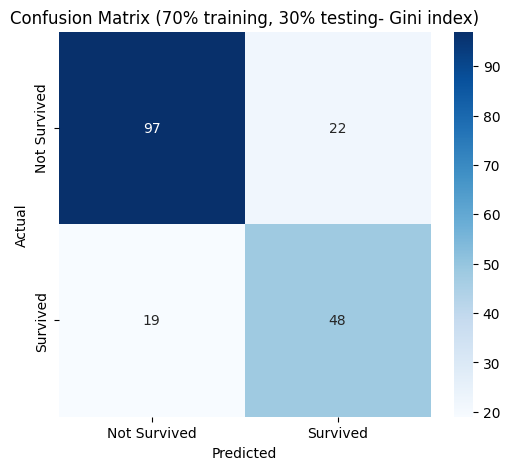

In [39]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm_70 = confusion_matrix(y_test_30, y_pred_70)
print("Confusion Matrix (70% training, 30% testing):")
print(cm_70)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (70% training, 30% testing- Gini index)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This section employs the gini index to evaluate the Decision Tree classifier's performance on the 70% training/30% testing split.  To find out how well the model distinguishes between the Survived and Not Survived classes, we compute the confusion matrix after making predictions.  The counts of true positives, true negatives, false positives, and false negatives are shown in the matrix.  In order to better understand the model's classification performance, we next use a heatmap to show the matrix.

Accuracy (70% training, 30% testing, Entropy): 0.7903225806451613
Confusion Matrix (70% training, 30% testing, Entropy):
[[100  19]
 [ 20  47]]


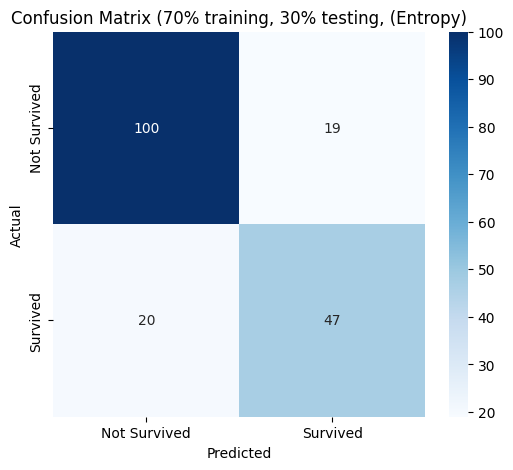

In [36]:
# 70% training, 30% testing using Entropy (Information Gain)

model_70_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# model training
model_70_entropy.fit(X_train_70, y_train_70)

y_pred_70_entropy = model_70_entropy.predict(X_test_30)

# accuracy calculation
accuracy_70_entropy = accuracy_score(y_test_30, y_pred_70_entropy)
print(f'Accuracy (70% training, 30% testing, Entropy): {accuracy_70_entropy}')

# confusion matrix
cm_70_entropy = confusion_matrix(y_test_30, y_pred_70_entropy)
print("Confusion Matrix (70% training, 30% testing, Entropy):")
print(cm_70_entropy)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_70_entropy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (70% training, 30% testing, (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This cell repeats 70/30 partitions using entropy.Attribute selection measure instead of the  Gini index.The model is trained on the same training/testing split to ensure a fair comparison. We compute accuracy and visualize the confusion matrix using the same heatmap style. This allows us to compare which criterion (Gini or Entropy) performs better for the 70/30 partition.

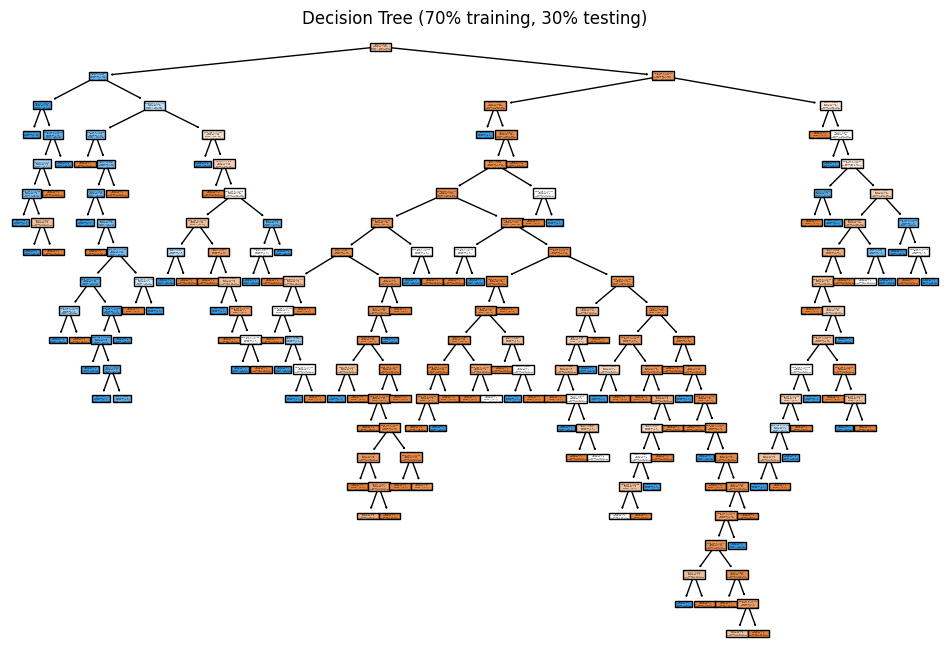

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(model_70, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (70% training, 30% testing)")
plt.show()

Using 70% of the data for training and 30% for testing with the Gini index, this diagram shows the complete Decision Tree. The tree repeatedly splits the data based on features such as age, gender, and ticket class to decide whether a passenger survived or not. The colors represent the predicted category: orange for “Survived” and blue for “Not Survived,” with darker shades indicating a larger number of passengers in that group. The tree appears very large because it continues to grow to match the training data as closely as possible. As a result, it learns even small details that may not be important, which makes the model perform extremely well on the training data.

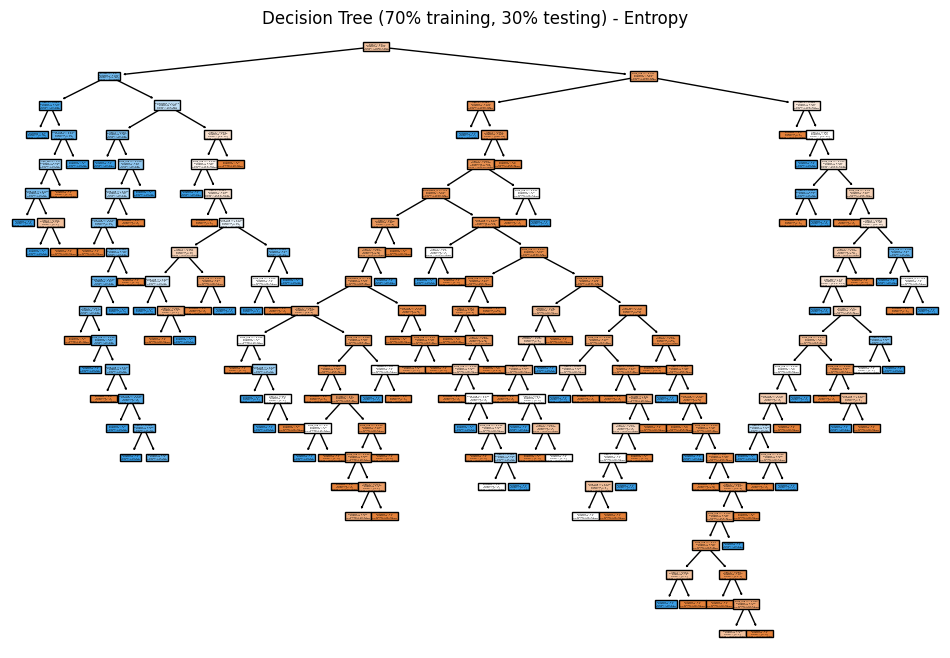

In [37]:
# Decision Tree (70% training, 30% testing) - Entropy
plt.figure(figsize=(12, 8))
plot_tree(model_70_entropy,
          filled=True,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (70% training, 30% testing) - Entropy")
plt.show()

This diagram shows the full Decision Tree trained using the Entropy (Information Gain) method on the 70% training and 30% testing split. The tree keeps dividing the data based on features like age, gender, and passenger class to decide whether someone survived or not. Each node represents a decision step, and the colors show the predicted class—blue for “Not Survived” and orange for “Survived,” with darker shades meaning more passengers fall into that group. Because Entropy tries to make each split as pure as possible, the tree grows very large and detailed, capturing many small patterns in the data. This explains why the tree looks deep and complex—it is learning many specific rules to separate the two classes.

Comparing Gini and Entropy (Information Gain)

---
For the 70/30 split, the Entropy-based decision tree performed slightly better (79.0% vs. 77.9% accuracy) compared to the Gini-based tree. While both methods showed similar performance in predicting the “Survived” class, the Entropy model was more accurate in predicting “Not Survived” cases, correctly identifying 100 passengers compared to 97 with the Gini mo

80% training and 20% testing

In [ ]:
# 2. Split data into 80% training and 20% testing
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model again on this new split
model_80 = DecisionTreeClassifier(random_state=42)
model_80.fit(X_train_80, y_train_80)

# Make predictions
y_pred_80 = model_80.predict(X_test_20)

accuracy_80 = accuracy_score(y_test_20, y_pred_80)
print(f'Accuracy (80% training, 20% testing): {accuracy_80}')

Accuracy (80% training, 20% testing): 0.7419354838709677


Confusion Matrix (80% training, 20% testing):
[[59 18]
 [14 33]]


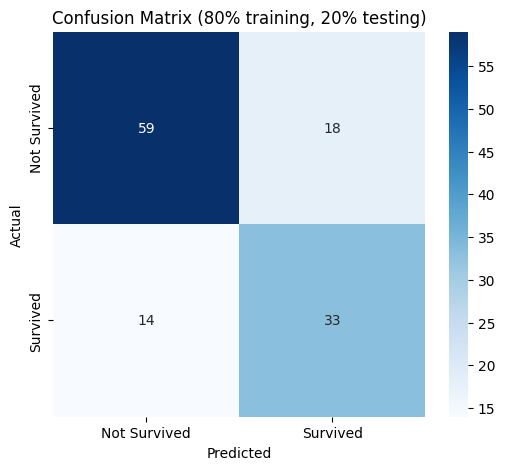

In [38]:
cm_80 = confusion_matrix(y_test_20, y_pred_80)
print("Confusion Matrix (80% training, 20% testing):")
print(cm_80)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy (80% training, 20% testing, Entropy): 0.7338709677419355
Confusion Matrix (80% training, 20% testing, Entropy):
[[59 18]
 [15 32]]


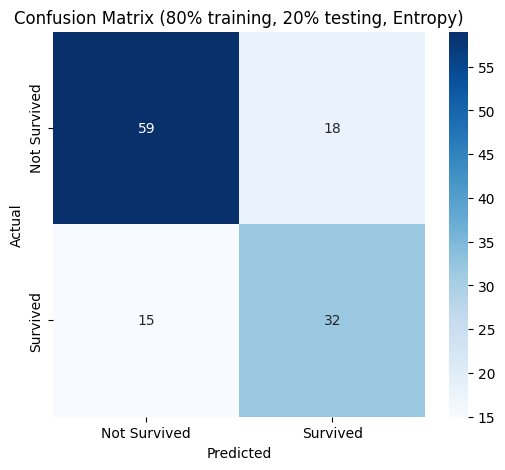

In [40]:
# 80% training, 20% testing using Entropy

model_80_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_80_entropy.fit(X_train_80, y_train_80)

y_pred_80_entropy = model_80_entropy.predict(X_test_20)

accuracy_80_entropy = accuracy_score(y_test_20, y_pred_80_entropy)
print(f'Accuracy (80% training, 20% testing, Entropy): {accuracy_80_entropy}')

cm_80_entropy = confusion_matrix(y_test_20, y_pred_80_entropy)
print("Confusion Matrix (80% training, 20% testing, Entropy):")
print(cm_80_entropy)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_80_entropy, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (80% training, 20% testing, Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


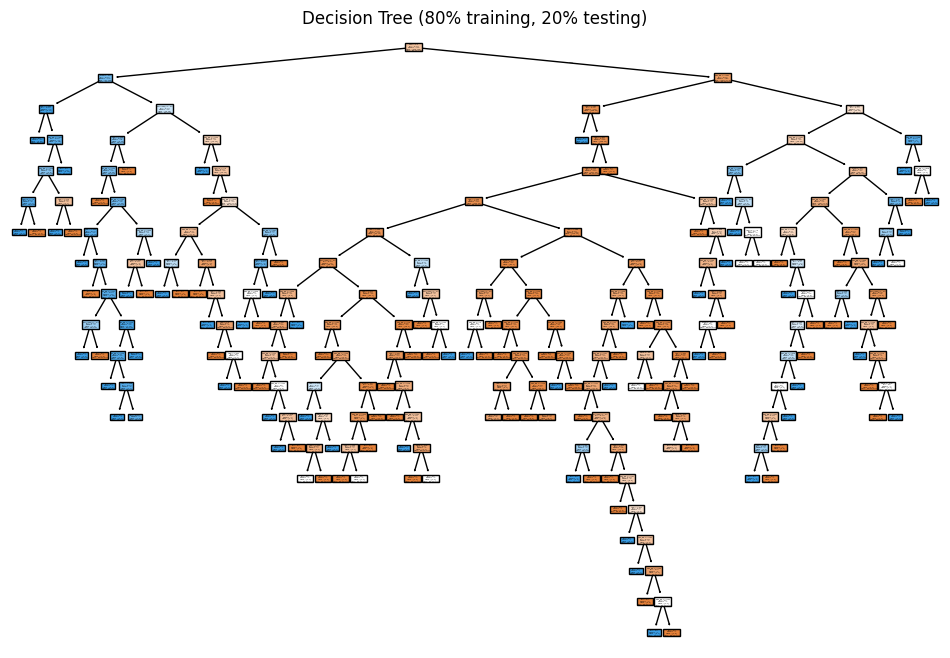

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_80, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (80% training, 20% testing)")
plt.show()

In [ ]:
# 3. Split data into 60% training and 40% testing
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
model_60 = DecisionTreeClassifier(random_state=42)
model_60.fit(X_train_60, y_train_60)
y_pred_60 = model_60.predict(X_test_40)
accuracy_60 = accuracy_score(y_test_40, y_pred_60)
print(f'Accuracy (60% training, 40% testing): {accuracy_60}')

Accuracy (60% training, 40% testing): 0.7661290322580645


In [ ]:
cm_60 = confusion_matrix(y_test_40, y_pred_60)
print("Confusion Matrix (60% training, 40% testing):")
print(cm_60)

Confusion Matrix (60% training, 40% testing):
[[131  27]
 [ 31  59]]


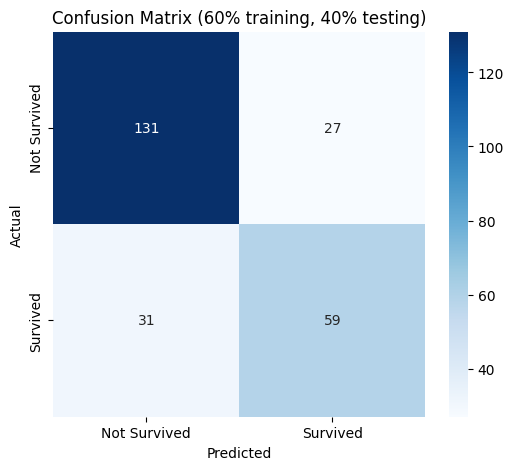

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm_60, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (60% training, 40% testing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

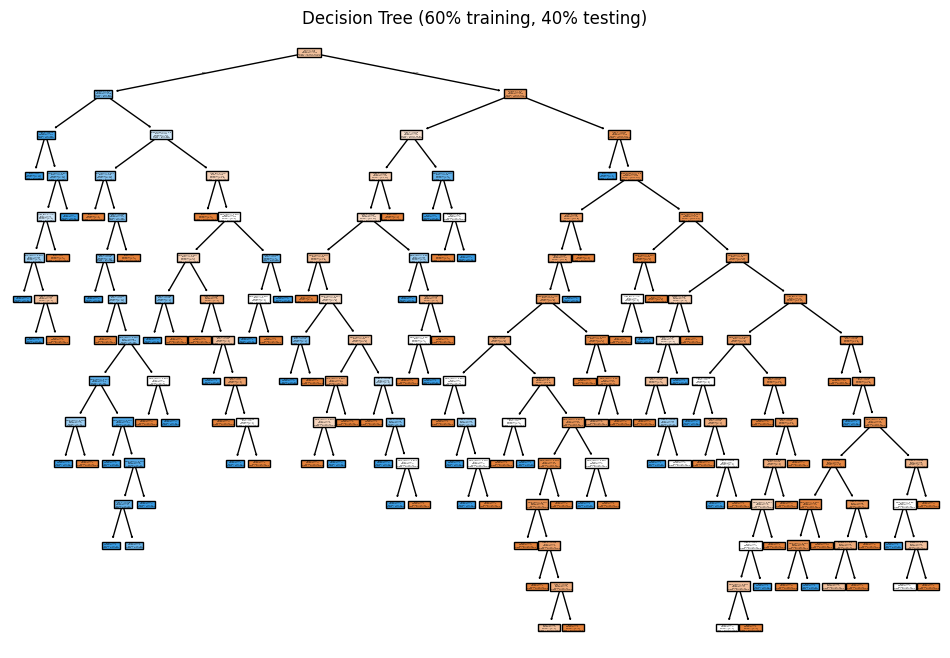

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model_60, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree (60% training, 40% testing)")
plt.show()

**- Clustering:**

In [ ]:
# Drop label (Survived) from clustering features
X = df.drop(columns=["Survived"])
# Convert boolean columns to int
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(int)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape after dropping Survived:", X_scaled.shape)

Shape after dropping Survived: (620, 9)


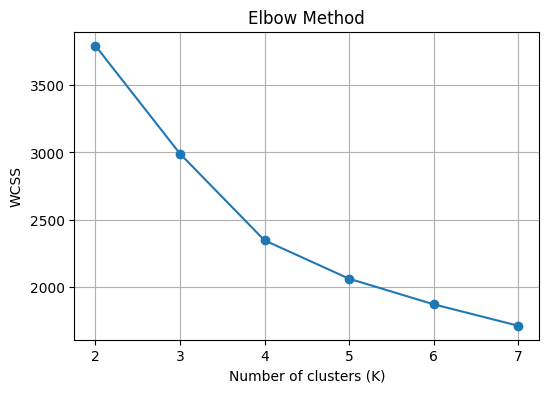

In [ ]:
# ----- Elbow Method -----
wcss = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

The curve shows a sharp decrease between K = 2, 3, and 4, and then the improvement starts to slow down after K = 4. This indicates that the elbow point is approximately around K = 3 or K = 4. Therefore, based on the Elbow Method, I selected three candidate values for K : 3, 4, 5 for further evaluation.

In [ ]:
#  ----- K-means for the selected K values -----
#  ----- and Average Silhouette, Total within-cluster sum of square for each k -----

# candidate K values based on the Elbow plot
candidate_K = [3, 4, 5]

silhouette_scores = {}
wcss_per_k = {}
labels_per_k = {}
models_per_k = {}

for k in candidate_K:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=5,
        max_iter=200
    )
    labels = kmeans.fit_predict(X_scaled)

    # Store results
    models_per_k[k] = kmeans
    labels_per_k[k] = labels
    wcss_per_k[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

# Print results
print("=== Results per K ===")
for k in candidate_K:
    print(f"\nK = {k}")
    print(f"  Total Within-Cluster Sum of Squares: {wcss_per_k[k]:.2f}")
    print(f"  Average Silhouette Score: {silhouette_scores[k]:.4f}")

# Select the best K based on highest Silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print("\nBest K based on Silhouette score:", best_k)


=== Results per K ===

K = 3
  Total Within-Cluster Sum of Squares: 2990.54
  Average Silhouette Score: 0.3523

K = 4
  Total Within-Cluster Sum of Squares: 2346.29
  Average Silhouette Score: 0.3846

K = 5
  Total Within-Cluster Sum of Squares: 2060.87
  Average Silhouette Score: 0.3736

Best K based on Silhouette score: 4


|                                    |   K = 3   |   K = 4   |   K = 5   |
|------------------------------------|-----------|-----------|-----------|
| Average Silhouette width           |  0.3523   |  0.3846   |   0.3736  |
| total within-cluster sum of square |  2990.54  |  2346.29  |  2060.87  |

The optimal K based on the Silhouette score is K = 4, since it produces the highest average Silhouette value. A higher Silhouette score indicates that the clusters are more compact and better separated, making K = 4 the best choice among the evaluated options.

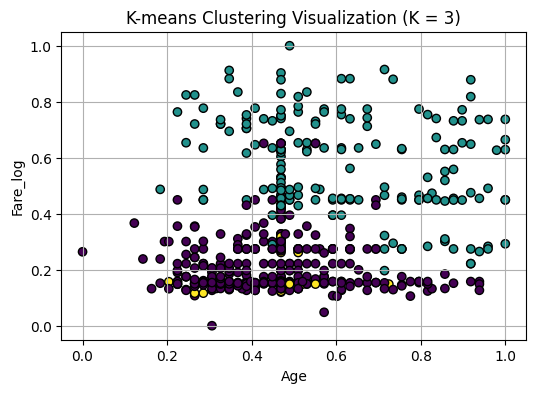

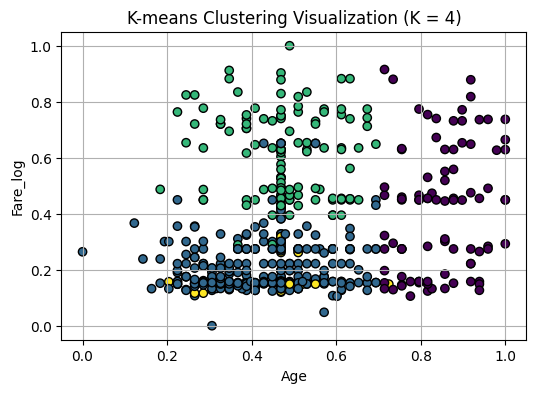

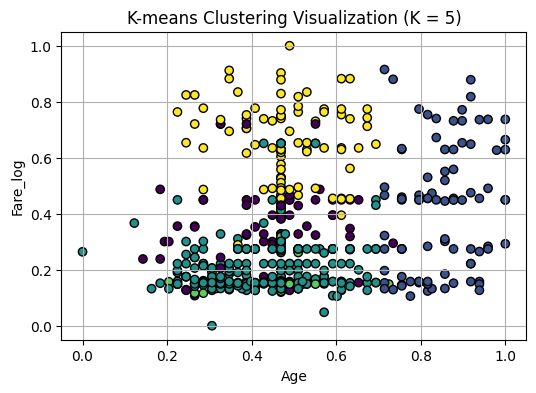

In [ ]:
# Choose two features for visualization
feature_x = "Age"
feature_y = "Fare_log"

for k in candidate_K:  # candidate_K = [3,4,5]
    labels = labels_per_k[k]

    plt.figure(figsize=(6, 4))
    plt.scatter(
        X[feature_x],
        X[feature_y],
        c=labels,
        cmap="viridis",
        edgecolor='k'
    )
    plt.title(f"K-means Clustering Visualization (K = {k})")
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.show()

Based on the majority rule, K = 4 was selected as the optimal number of clusters. In the Elbow plot, K = 4 is close to the elbow point. K = 4 also has the highest average Silhouette score, which means the clusters are more compact and better separated. The visualizations for K = 4 show clearer colored groups than K = 3 and K = 5. Since the Elbow, Silhouette, and visual plots all support K = 4, we chose it as the best K.